In [36]:
# Importing Necessary Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, cohen_kappa_score,ConfusionMatrixDisplay

In [2]:
# load the dataset
Telco_Data=pd.read_csv(r"C:\Users\Pathb\Downloads\Telecom Churn.csv")

## data exploration

In [3]:
Telco_Data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
Telco_Data=Telco_Data.drop('phone number',axis=1)

In [5]:
#deleting the duplicate values if it exists - Is this needed??
df_dup = Telco_Data.drop_duplicates()
df_dup.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## checking the distribution of Target column - churn

In [6]:

round((Telco_Data[Telco_Data['churn']==True]['churn'].count()/len(Telco_Data.index))*100,1)

14.5

### The data is imbalanced as the positive cases are only 14 percent of the overall population.

In [7]:
Telco_Data['state'].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [8]:
print(Telco_Data.groupby(['area code'])['state'].unique())

area code
408    [OH, LA, IA, ID, CO, WY, MT, AZ, OK, AK, NJ, G...
415    [KS, OH, NJ, OK, MO, WV, IN, RI, IA, NY, TX, F...
510    [AL, MA, MT, VT, VA, HI, NH, AR, WI, MN, TX, N...
Name: state, dtype: object


In [9]:
Remove_Columns=['state','account length','international plan','voice mail plan']

In [10]:
#removing the catagorical values for analysis purpose
Numeric_df=Telco_Data.drop(Remove_Columns,axis=1)
Numeric_df.head()

,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [11]:
Aggr_Data_Area_Code=Numeric_df.groupby(['area code']).sum()

In [12]:
Aggr_Data_Area_Code

,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
area code,,,,,,,,,,,,,,,
408,6426,148473.0,84216,25240.79,168676.2,83623,14337.60,166941.9,82995,7512.49,8485.9,3709,2291.71,1273,122
415,13832,300535.8,166454,51092.06,332079.2,166334,28226.97,334372.2,166159,15046.92,17118.4,7550,4622.84,2572,236
510,6736,150181.6,84082,25531.32,169112.1,83724,14374.87,168192.4,84505,7568.66,8516.6,3671,2299.80,1364,125


In [13]:
Aggr_Data_Area_Code['total day calls'].max()

166454

In [14]:
# describe the five points of statistics for numerical data
Telco_Data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [15]:
# Describe the statistics for string data
Telco_Data.describe(include='O')


,state,international plan,voice mail plan
count,3333,3333,3333
unique,51,2,2
top,WV,no,no
freq,106,3010,2411


In [16]:
Remove_Columns

['state', 'account length', 'international plan', 'voice mail plan']

### univariate analysis

In [17]:
cat_col=['state', 'international plan', 'voice mail plan']

In [18]:
def with_per(total, axis):
    for p in axis.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')

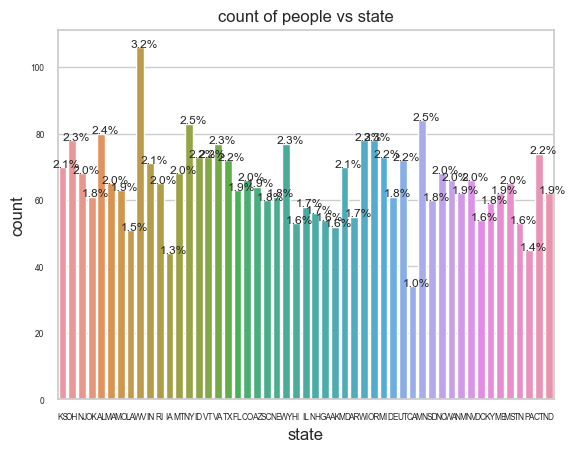

<Figure size 2000x500 with 0 Axes>

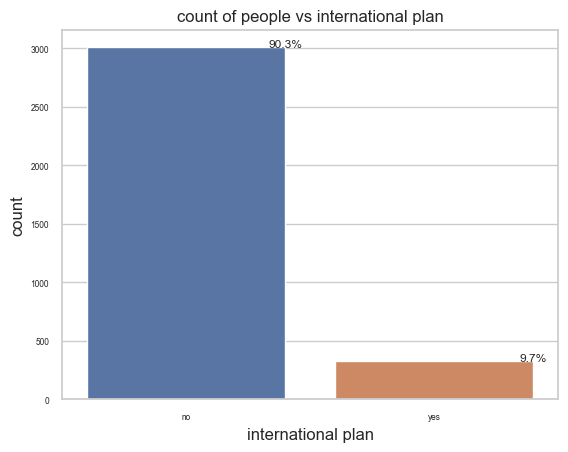

<Figure size 2000x500 with 0 Axes>

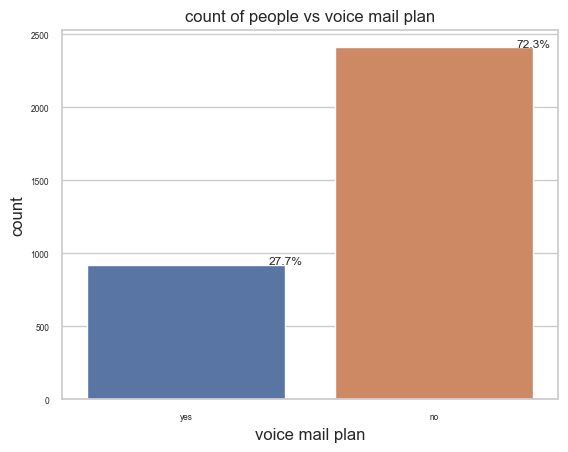

<Figure size 2000x500 with 0 Axes>

In [19]:
#Visualize the categorical features

for i in cat_col:
    sns.set(style = 'whitegrid')
    ax=sns.countplot(x = Telco_Data[i], data = Telco_Data)
    plt.title("count of people vs " + i)
    plt.figure(figsize=(20,5))
    sns.set_context("paper", font_scale=0.9)
    ax.tick_params(labelsize=6)
    total = len(Telco_Data)
    with_per(total, ax)
    plt.show()
    

#### As per this chart,
#### the data is skewed towards 'No' for voice mail plan
#### the data is skewed towards 'yes' for international plan

### bivariate analysis

In [21]:
rc=['churn','area code']

In [22]:
ba=Numeric_df.drop(rc, axis=1)

C:\Users\Pathb\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\Pathb\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\Pathb\anaconda3\Lib\s

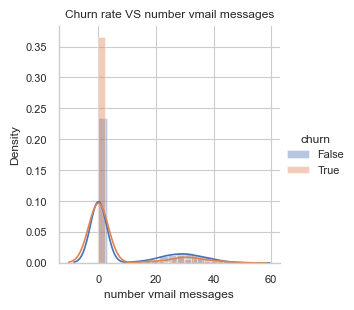

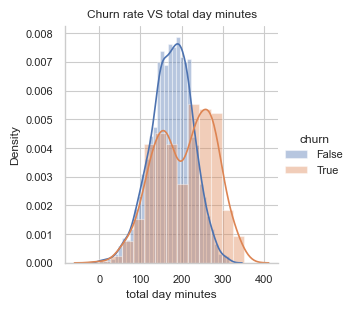

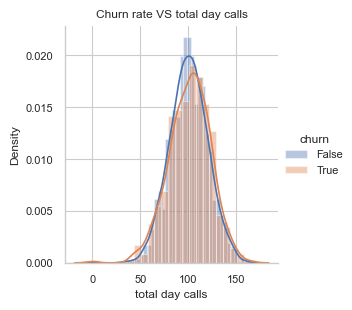

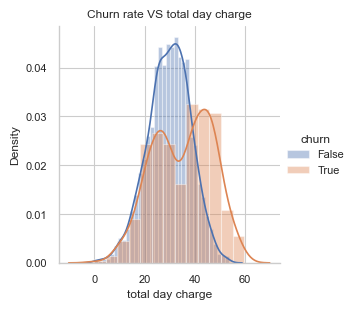

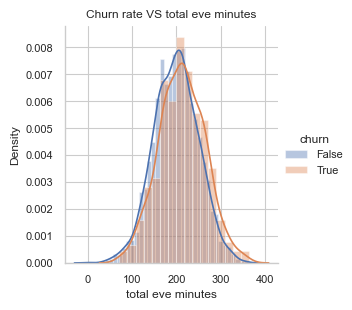

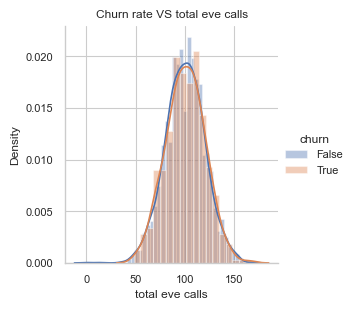

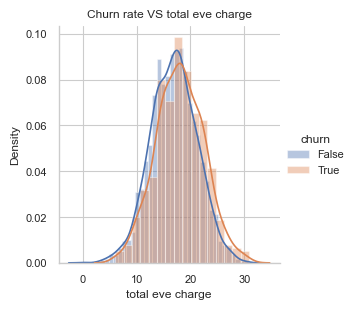

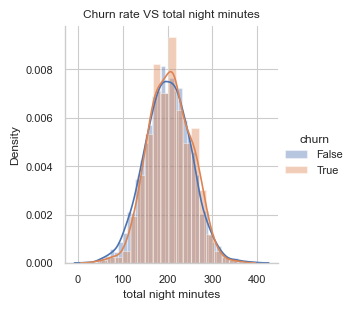

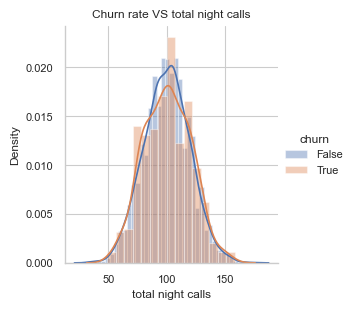

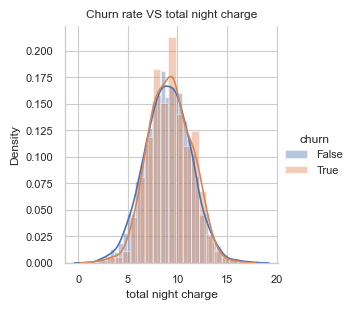

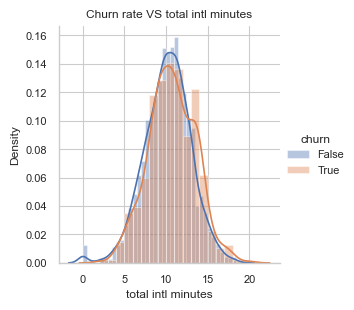

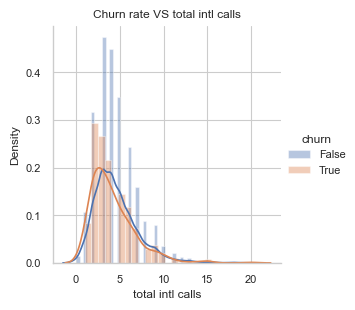

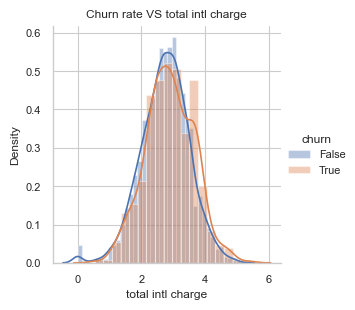

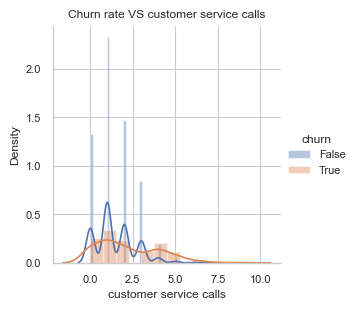

In [23]:
#it is a bivariante analysis
for i in ba.columns:
    sns.FacetGrid(Telco_Data,hue='churn').map(sns.distplot,i ).add_legend()
    plt.title('Churn rate VS ' + i)

->More churn rate when the number_vamil_messages is 0

->Churn rate is high when the total_day_minutes is lies between 210 min to 300 min.

->churn rate is high when the total_day_calls lies between 85 to 115.

->churn rate is high when total day charge is lies between 40 to 50.

->churn rate is high when the total evening minutes is lies between 180 min to 220 min.

->churn rate is high when total evening calls lies between 90 to 115.

->churn rate is high when the total evening charge is lies between 15 to 18

->Churn rate is high when the total_night_minutes is lies between 190 to 220 min

->churn rate is high when total_nigh_calls lies between 90 to 110.

->churn rate is high when total_night_charge lies between 7.5 to 10.

->churn rate is high when total international minutes lies between 9 to 12.

->churn rate is high when total international calls is 1.

->churn rate is high when total international charge is 2.5 to 3.

->churn rate is high when number of customer service calls is 1.



In [24]:
num_features=['area code', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls']

## Handling the Categorical Variable¶


state feature has 51 different categories and converting into onehot encoder results in creation of 51 different features and that can lead to overfitting. Hence, applying hashing encoding for state feature. 

In [25]:
hash_state = ce.HashingEncoder(cols = 'state')
train = hash_state.fit_transform(Telco_Data)
test = hash_state.transform(Telco_Data)
train.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,account length,area code,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,0,1,0,0,0,0,0,0,128,415,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,0,0,0,0,1,0,0,0,107,415,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,0,1,0,0,0,0,0,0,137,415,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,0,0,0,0,1,0,0,0,84,408,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,0,0,0,0,1,0,0,0,75,415,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [26]:
# replace no to 0 and yes to 1
train['international plan'].replace(['no','yes'],[0,1],inplace = True)
train['voice mail plan'].replace(['no','yes'],[0,1],inplace=True)
train['churn'].replace(['False','True'],[0,1],inplace = True)
train.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,account length,area code,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,0,1,0,0,0,0,0,0,128,415,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,0,0,0,0,1,0,0,0,107,415,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,0,1,0,0,0,0,0,0,137,415,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,0,0,0,0,1,0,0,0,84,408,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,0,0,0,0,1,0,0,0,75,415,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [27]:
x = train.drop('churn',axis=1).values
y = train.churn.values
# spliting the data into test and train
x_train, x_test , y_train, y_test = train_test_split(x, y , test_size=0.3, random_state=0)

### Given the imbalance in target column, we are performing upsampling for label = 1

In [28]:
print('Before upsampling count of label 0 {}'.format(sum(y_train==0)))
print('Before upsampling count of label 1 {}'.format(sum(y_train==1)))

Before upsampling count of label 0 1988
Before upsampling count of label 1 345


# Minority Over Sampling Technique

In [29]:
sm = SMOTE(random_state=42)   
x_train_s, y_train_s = sm.fit_resample(x_train, y_train)
                                         
print('After upsampling count of label 0 {}'.format(sum(y_train_s==0)))
print('After upsampling count of label 1 {}'.format(sum(y_train_s==1)))

After upsampling count of label 0 1988
After upsampling count of label 1 1988


-> after apply the upsampling technique the number of samples of both classes are same

#### Scaling the dataset

In [30]:
# creating the object of minmax scaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


## build model

Support Vector Classification

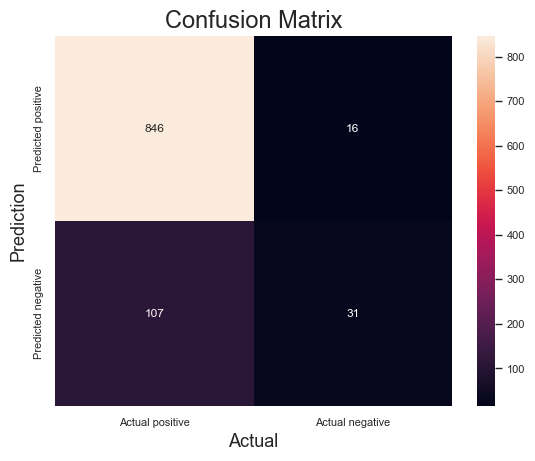

Accuracy: 
0.877
Classification report: 
              precision    recall  f1-score   support

       False       0.89      0.98      0.93       862
        True       0.66      0.22      0.34       138

    accuracy                           0.88      1000
   macro avg       0.77      0.60      0.63      1000
weighted avg       0.86      0.88      0.85      1000

Confusion Matrix
[[846  16]
 [107  31]]
Cohen kappa score: 
0.28500011626014377


In [48]:
svc = SVC(kernel='rbf', decision_function_shape='ovr',random_state=25)
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
sns.heatmap(confusion_matrix(y_test, y_pred), 
            annot=True,
            fmt='g',yticklabels=['Predicted positive', 'Predicted negative'],
            xticklabels=['Actual positive', 'Actual negative'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()
print('Accuracy: ')
print('{}'.format(accuracy_score(y_test, y_pred)))
print('Classification report: ')
print('{}'.format(classification_report(y_test, y_pred)))
print('Confusion Matrix')
print('{}'.format(confusion_matrix(y_test, y_pred)))
print('Cohen kappa score: ')
print('{}'.format(cohen_kappa_score(y_test, y_pred)))

 Random Forest Classifier

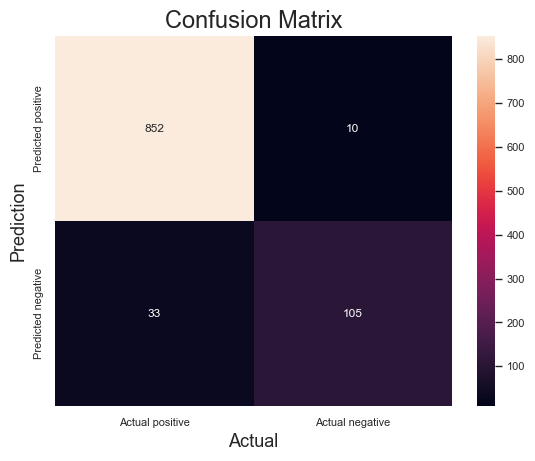

Accuracy: 
0.957
Classification report: 
              precision    recall  f1-score   support

       False       0.96      0.99      0.98       862
        True       0.91      0.76      0.83       138

    accuracy                           0.96      1000
   macro avg       0.94      0.87      0.90      1000
weighted avg       0.96      0.96      0.96      1000

Confusion Matrix
[[852  10]
 [ 33 105]]
Cohen kappa score: 
0.8056585013106752


In [49]:
rfc = RandomForestClassifier(random_state=25)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
sns.heatmap(confusion_matrix(y_test, y_pred), 
            annot=True,
            fmt='g',yticklabels=['Predicted positive', 'Predicted negative'],
            xticklabels=['Actual positive', 'Actual negative'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()
print('Accuracy: ')
print('{}'.format(accuracy_score(y_test, y_pred)))
print('Classification report: ')
print('{}'.format(classification_report(y_test, y_pred)))
print('Confusion Matrix')
print('{}'.format(confusion_matrix(y_test, y_pred)))
print('Cohen kappa score: ')
print('{}'.format(cohen_kappa_score(y_test, y_pred)))

-> From the above results we can observe that the False Negative are more in the svm compare to random forest classifier which
is our high priority to minimise the value as low as possible .

